# Fair Workflows evaluation

## Using the fairworkflows library
The `fairworkflows` library is intended to provide a simple way to make your 'normal' python code FAIR, automatically generating a prospective provenance description of the workflow (prior to execution) and a retrospective provenance description during execution. All these semantic descriptions are in the form of RDF triples, which can be published as a series of nanopublications.

## How do I use it?
The library introduces two decorators: `is_fairstep` and `is_fairworkflow`. `is_fairstep` is used to mark functions that are 'steps' in your processing, and `is_fairworkflow` is used to mark functions which combine these steps into the overall 'workflow'.

This should hopefully become clearer with an example:

### 1. Import the decorators

In [15]:
from fairworkflows import is_fairworkflow, is_fairstep, FairStep, FairWorkflow

### 2. Define your steps
Each 'step' should be in a function. The arguments to the function should ideally have type hinting. You must mark the function using the is_fairstep decorator, and provide a 'label' - a string that gives a more verbose title to the step.

In [16]:
@is_fairstep(label='Addition')
def add(a:float, b:float) -> float:
    """Adding up numbers!"""
    return a + b

In [17]:
@is_fairstep(label='Subtraction')
def sub(a: float, b: float) -> float:
    """Subtracting numbers."""
    return a - b

In [18]:
@is_fairstep(label='Multiplication')
def mul(a: float, b: float) -> float:
    """Multiplying numbers."""
    return a * b

In [19]:
@is_fairstep(label='A strange step with little use')
def weird(a: float, b:float) -> float:
    """A weird function"""
    return a * 2 + b * 4
    

### Define your workflow using @fairworkflow
Now write a function which describes your workflow. Mark this function with the @is_fairworkflow decorator.

In [20]:
@is_fairworkflow(label='My Workflow')
def my_workflow(in1, in2, in3):
    """
    A simple addition, subtraction, multiplication workflow
    """
    t1 = add(in1, in2)
    t2 = sub(in1, in2)
    t3 = mul(weird(t1, in3), t2)
    return t3

## Create an instance of your workflow and display it
Now that you have marked your steps and workflow, you are ready to create a FAIR workflow from it:

In [21]:
fw = FairWorkflow.from_function(my_workflow)

If you check the type of `fw` you will see that you have a `FairWorkflow` object.

In [22]:
type(fw)

fairworkflows.fairworkflow.FairWorkflow

You can optionally display this workflow object graphically, using its `display()` method:

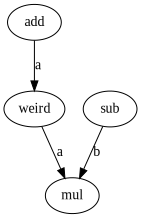

In [23]:
fw.display()

## Publish the (prospective) workflow
Now that you have a workflow, you may already publish the prospective provenance as a series of nanopublications:

In [24]:
fw.publish_as_nanopub(publish_steps=True, use_test_server=True)

Published to http://purl.org/np/RAd0j0a6xcn-g6GC5TYpgKYmVJa_McGRgX_1SNzl1ceNI
Published concept to http://purl.org/np/RAd0j0a6xcn-g6GC5TYpgKYmVJa_McGRgX_1SNzl1ceNI#step
Published to http://purl.org/np/RAb_qxuAqPHXTl2ERBD_6RWo07zbgC5m_5mn3vjh_9v0M
Published concept to http://purl.org/np/RAb_qxuAqPHXTl2ERBD_6RWo07zbgC5m_5mn3vjh_9v0M#step
Published to http://purl.org/np/RA7hVH4X37x6BHrGe-HH4i3i78BtvflDqb9qVQRU_7rwg
Published concept to http://purl.org/np/RA7hVH4X37x6BHrGe-HH4i3i78BtvflDqb9qVQRU_7rwg#step
Published to http://purl.org/np/RA2m27ux_IT5wV8CCi_0kY2kT-XfzXlFbeboyzawKkrzo
Published concept to http://purl.org/np/RA2m27ux_IT5wV8CCi_0kY2kT-XfzXlFbeboyzawKkrzo#step
Published to http://purl.org/np/RAlBdgSVSeSWSeMb4V8koEksFu40xjThmXJJopStyBeOY
Published concept to http://purl.org/np/RAlBdgSVSeSWSeMb4V8koEksFu40xjThmXJJopStyBeOY#plan


{'nanopub_uri': 'http://purl.org/np/RAlBdgSVSeSWSeMb4V8koEksFu40xjThmXJJopStyBeOY',
 'concept_uri': 'http://purl.org/np/RAlBdgSVSeSWSeMb4V8koEksFu40xjThmXJJopStyBeOY#plan'}

## Execute your workflow using .execute()
You can now execute your workflow. This workflow took three input parameters, so we must provide these are arguments to its `execute()` method.

In [25]:
result, prov = fw.execute(1, 4, 3)
result

-66

### Retrospective prov for each step
You can iterate through a WorkflowRetroProv object to get the StepRetroProv objects for each step. Print these to see the RDF they contain (input/output variable values, start and end datetime of the step's execution etc.) 

### Publish the retrospective provenance
You can use the .publish_as_nanopub() method as with FairStep and FairWorkflow objects. This publishes a nanopub per step and one for the whole workflow, mirroring the prospective RDF.

In [26]:
prov.publish_as_nanopub(use_test_server=True)

Published to http://purl.org/np/RABhzDiNxo-trqwQl0JrR-SzdCYCDvBmH2GVA_sY7vGwg
Published concept to http://purl.org/np/RABhzDiNxo-trqwQl0JrR-SzdCYCDvBmH2GVA_sY7vGwg#fairstepprov
Published to http://purl.org/np/RAYvHBcDbTBwMzy2hDN-NNB9Kq-0w9kKhtm9niUcz0SOw
Published concept to http://purl.org/np/RAYvHBcDbTBwMzy2hDN-NNB9Kq-0w9kKhtm9niUcz0SOw#fairstepprov
Published to http://purl.org/np/RAYTvxRGZjTCDuF8KTFuGSZP7hj8RU1uXNQFAlUmU7Crs
Published concept to http://purl.org/np/RAYTvxRGZjTCDuF8KTFuGSZP7hj8RU1uXNQFAlUmU7Crs#fairstepprov
Published to http://purl.org/np/RA4_Q3furwrSbn5Rmcq1eLVrDLDIlR9jRq1zjaEOoiLPg
Published concept to http://purl.org/np/RA4_Q3furwrSbn5Rmcq1eLVrDLDIlR9jRq1zjaEOoiLPg#fairstepprov
Published to http://purl.org/np/RAeNhLwnAVbD3FTcRFok2i9WsLO0-vzZDz7GN290axV2Q
Published concept to http://purl.org/np/RAeNhLwnAVbD3FTcRFok2i9WsLO0-vzZDz7GN290axV2Q#fairworkflowprov


{'nanopub_uri': 'http://purl.org/np/RAeNhLwnAVbD3FTcRFok2i9WsLO0-vzZDz7GN290axV2Q',
 'concept_uri': 'http://purl.org/np/RAeNhLwnAVbD3FTcRFok2i9WsLO0-vzZDz7GN290axV2Q#fairworkflowprov'}

The last nanopub (whose URI ends in #fairworkflowprov) contains the links to all of the individual step retrospective provenances.

### Using FAIRWorkflows Jupyter Lab extension
You should see a tab in the far left sidebar of this window called 'FAIRWorkflows'. Click on this tab and the extension widget should open on the left. It will look something like this:

![image.png](introimg/fairworkflows_widget.png)

You can search for existing steps using text in the search bar. Results will appear below, as you type. Clicking on a result will inject that step's description into the notebook, into a new cell beneath the currently selected one. Ensure that 'raw' is selected as the `Inject` option:

![image.png](introimg/inject.png)

Try typing "rotate" into the Search field. After a brief moment, some search results should appear. Click on one and it will fetch the step from that nanopublication and inject it into this notebook. Please check that you have selected the notebook cell below this one, so that it is injected there.

In [ ]:
# Select this cell before clicking on the search result. The code should then be injected into the cell beneath this one.

If the code for the `rotate` step correctly appeared (a python function starting with @is_fairstep), then congratulations! You have finished the tutorial section and may move on to the short tasks below. If you are having difficulties then please don't hesitate to contact the evaluation organisers.